# **Heart Disease Prediction**

# **Decision Tree**

### **1.Decision Tree**
- A Decision Tree is a supervised learning algorithm used for both **classification and regression tasks in machine learning.** It is a tree-like structure where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome (or label).

### **2.Key Concepts:**

- **Root Node:** The topmost node in the tree, which represents the best feature to split the data on. It acts as the starting point for making predictions.

- **Decision Nodes:** These are the internal nodes where the data is split based on the feature value. Each decision node leads to further branches based on conditions.

- **Leaf Node (Terminal Node):** These are the nodes that contain the final output (a class label in classification tasks or a value in regression tasks). Once the data reaches a leaf node, no further splitting occurs.

- **Branches:** The possible outcomes of a decision, leading to either another decision node or a leaf node.

<center>
<!-- <h1 style=color:blue>California Housing</h1> -->
<img src="https://images.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" width=800 height = 500>
</center>

### **3.How Decision Trees Work:**
- The algorithm starts by selecting the feature that best splits the dataset. This selection is often based on metrics like **Gini Impurity** (for classification tasks), **Entropy** (used in Information Gain), or **Mean Squared Error** (for regression).

- The dataset is then split into subsets based on the selected feature, and the process is repeated recursively for each subset.

- The process continues until one of the stopping criteria is met (e.g., maximum depth of the tree, minimum number of samples required to split, or no further improvement in splitting).

### **4.Key Metrics:**

- **Gini Impurity:** Measures the likelihood of incorrect classification. The lower the Gini impurity, the better the split.

- **Entropy (Information Gain):** Measures the uncertainty in a dataset. A higher information gain suggests a better split.

- **Mean Squared Error (MSE):** Used in regression trees to determine how well a split minimizes error in predictions.

### **5.Advantages:**

- **Interpretability:** Decision Trees are easy to interpret, visualize, and explain.

- **Non-linear Relationships:** They can model complex, non-linear relationships.

- **No Need for Feature Scaling:** Decision Trees don’t require normalized or standardized data.

### **6.Disadvantages:**

- **Overfitting:** They can overfit the training data, especially when the tree grows very deep. Pruning techniques are often used to combat this.

- **Instability:** Small changes in the data can result in a completely different tree.

### **7.Pruning**

- To overcome overfitting, pruning techniques are used. Pruning reduces the size of the tree by removing nodes that provide little power in classifying instances. 

    **There are two main types of pruning:**

- **Pre-pruning (Early Stopping):** Stops the tree from growing once it meets certain criteria (e.g., maximum depth, minimum number of samples per leaf).

- **Post-pruning:** Removes branches from a fully grown tree that do not provide significant power.

### **8.Applications of Decision Trees**

- **Business Decision Making:** Used in strategic planning and resource allocation.

- **Healthcare:** Assists in diagnosing diseases and suggesting treatment plans.

- **Finance:** Helps in credit scoring and risk assessment.

- **Marketing:** Used to segment customers and predict customer behavior.

### **Dataset Information:**

## **Variable Description:**

Description

- age : Age of the patient

- gender: Gender of the patient - (0,1) - (Male, Female)

- chest_pain :It refers to the chest pain experienced by the patient -(0,1,2,3)

- rest_bps : Blood pressure of the patient while resting(in mm/Hg)

- cholesterol : Patient's cholesterol level (in mg/dl)

- fasting_blood_sugar : The blood sugar of the patient while fasting

- rest_ecg : Potassium level (0,1,2)

- thalach : The patient’s maximum heart rate

- exer_angina : It refers to exercise-induced angina - (1=Yes, 0=No)

- old_peak : It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)

- slope : It refers to the slope of the peak of the exercise ST-Segment- (0,1,2)

- ca : Number of major vessels - (0,1,2,3,4)

- thalassemia : It refers to thalassemia which is a blood disorder - (0,1,2,3)

- target : The patient has heart disease or not - (1=Yes, 0=No)

### **1. Import Libraries**

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
data = pd.read_csv(r'C:\Users\Vignesh Prabhu\OneDrive\Desktop\Data Analytics PGA\Class_Lectures_PGA\ML_PGA\Excel ML Datasets\HeartDisease.csv')
data.head() 

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### **EDA and Preprocessing**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# finding the missing values
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

<Figure size 1000x1000 with 0 Axes>

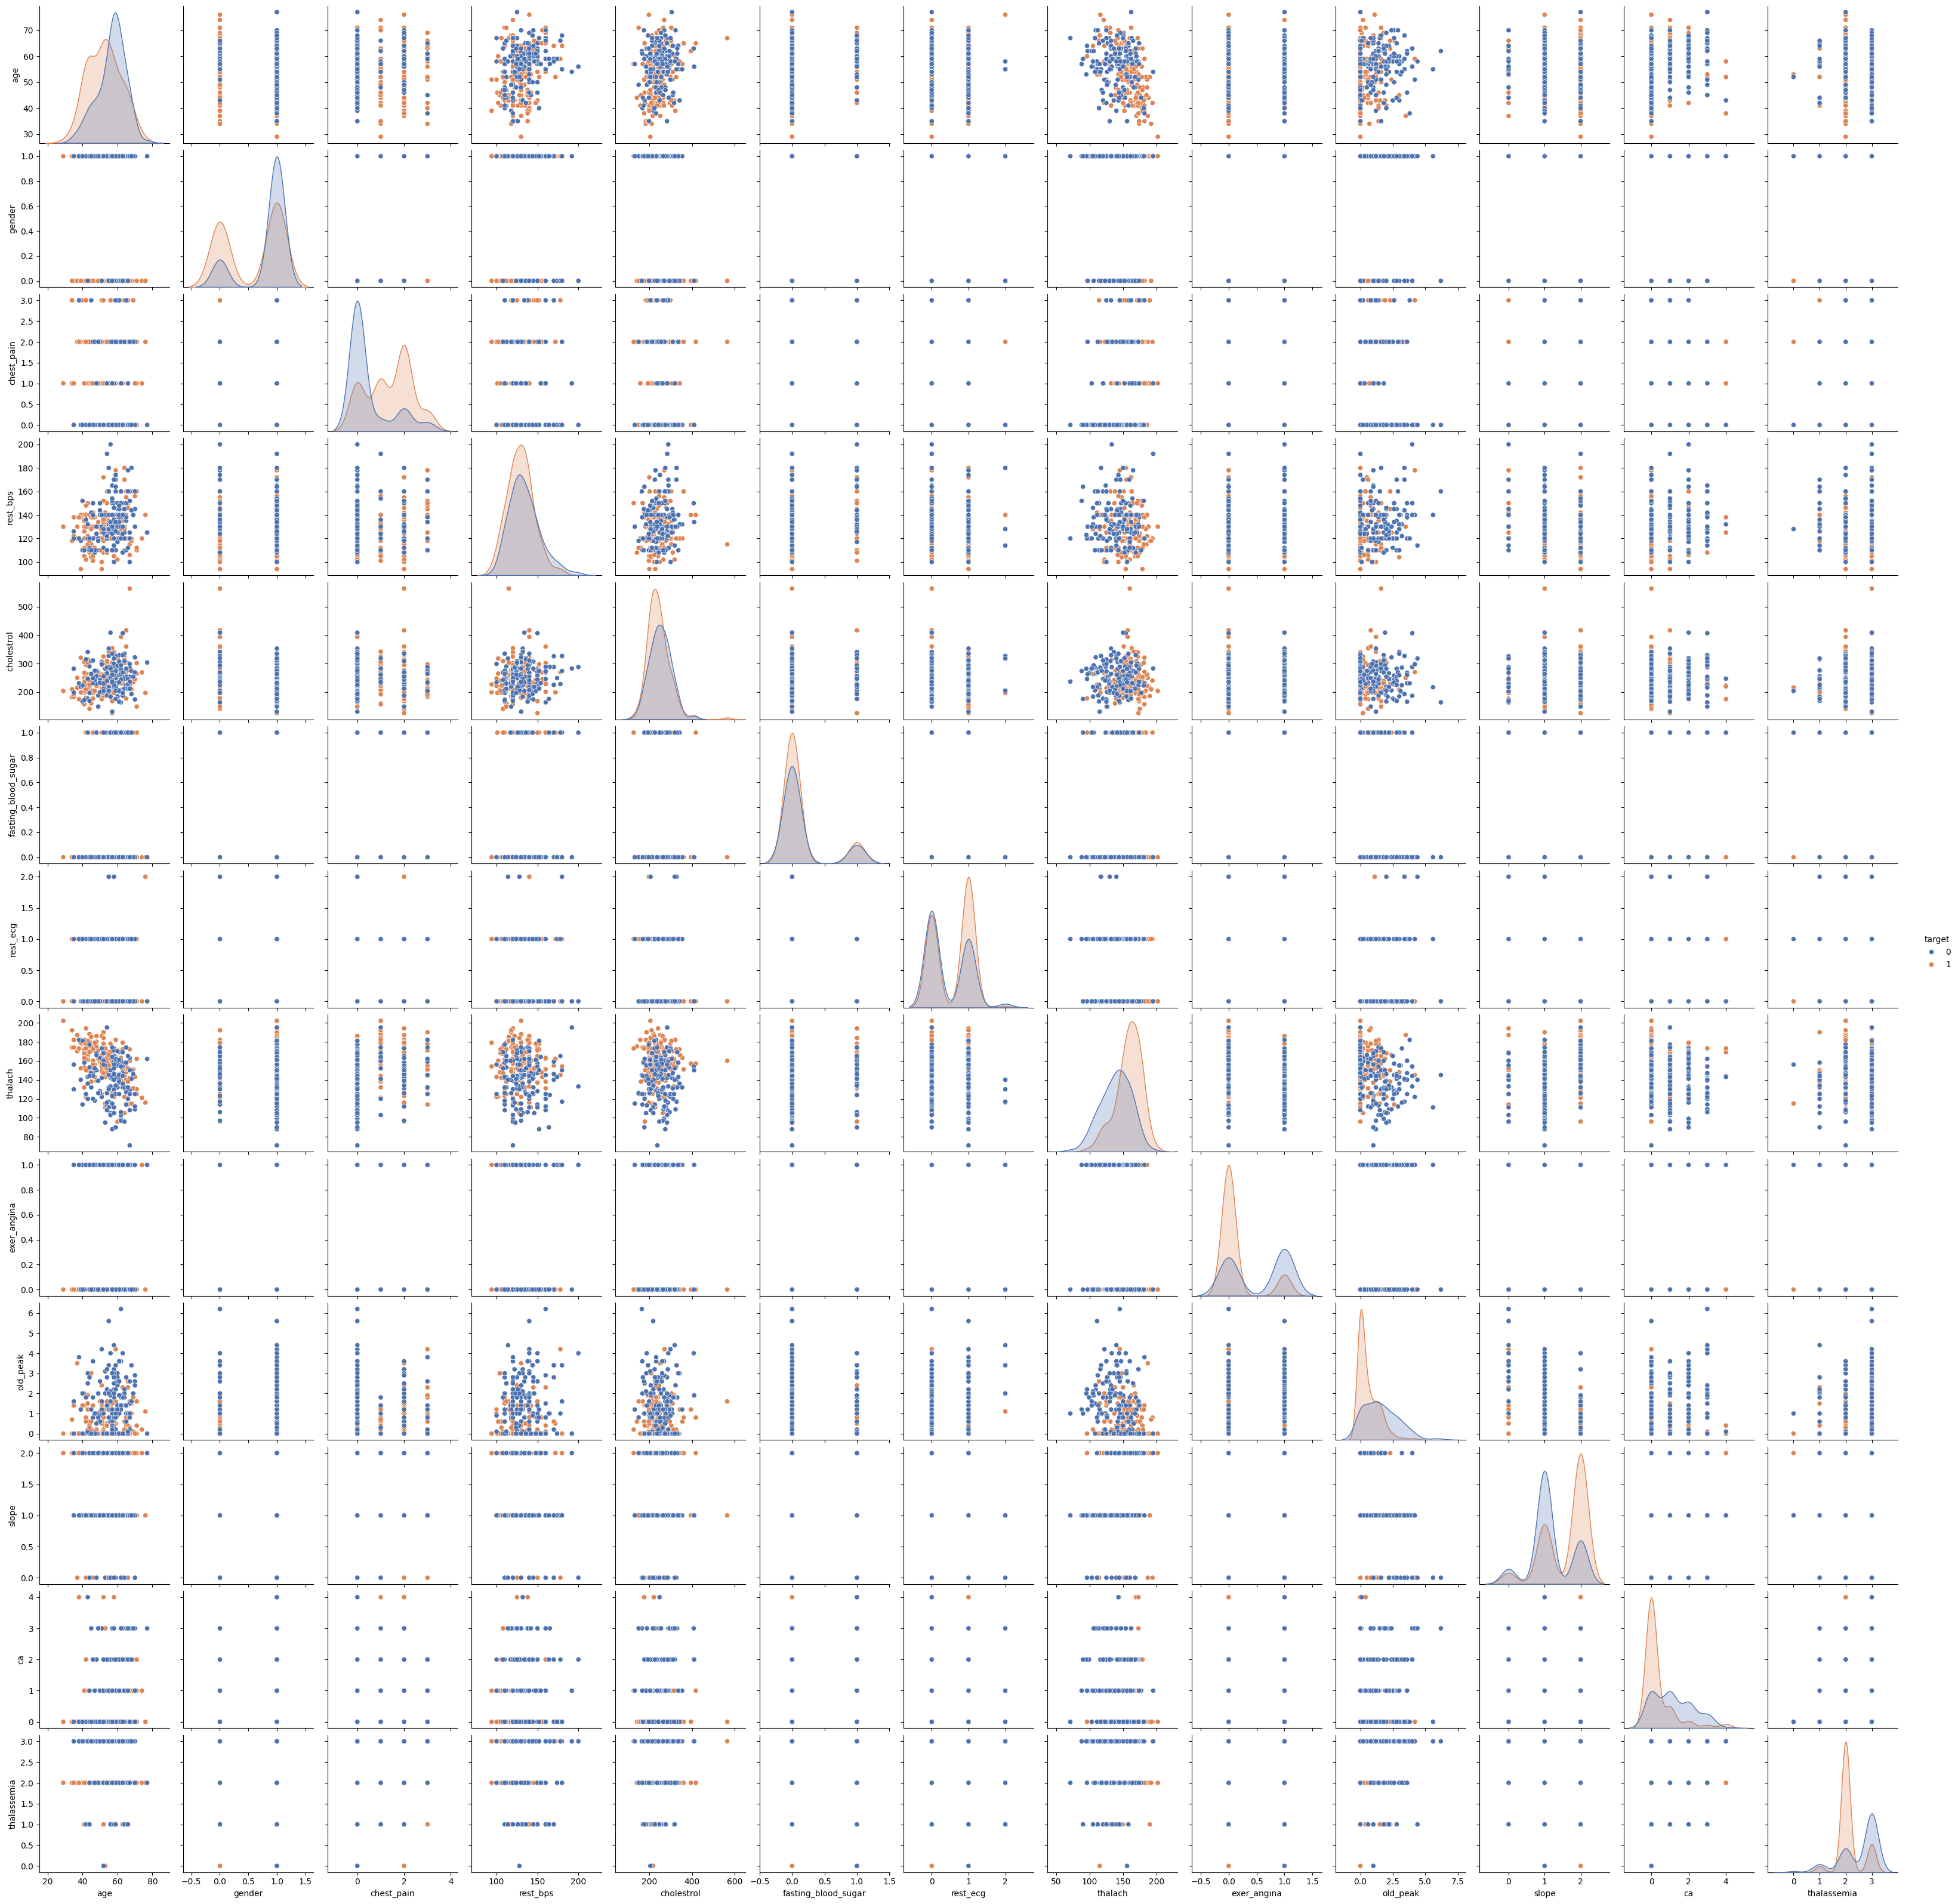

In [8]:
# Include target variable 'target' in the DataFrame for pairplot
plt.figure(figsize=(10,10))
sns.pairplot(data, hue='target', palette='deep')

# Show the plot
plt.show()

### **Descriptive Stats**

In [9]:
data.describe(include='all').fillna('-')

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### **Outliers**

In [10]:
def remove_outliers(df, columns):
  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    #Define outlier boundries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

  return df

if data is not None:
  num_col = data.select_dtypes('number').columns
  data = remove_outliers(data, num_col)
else:
  print("data is None")

data1=remove_outliers(data,num_col) 

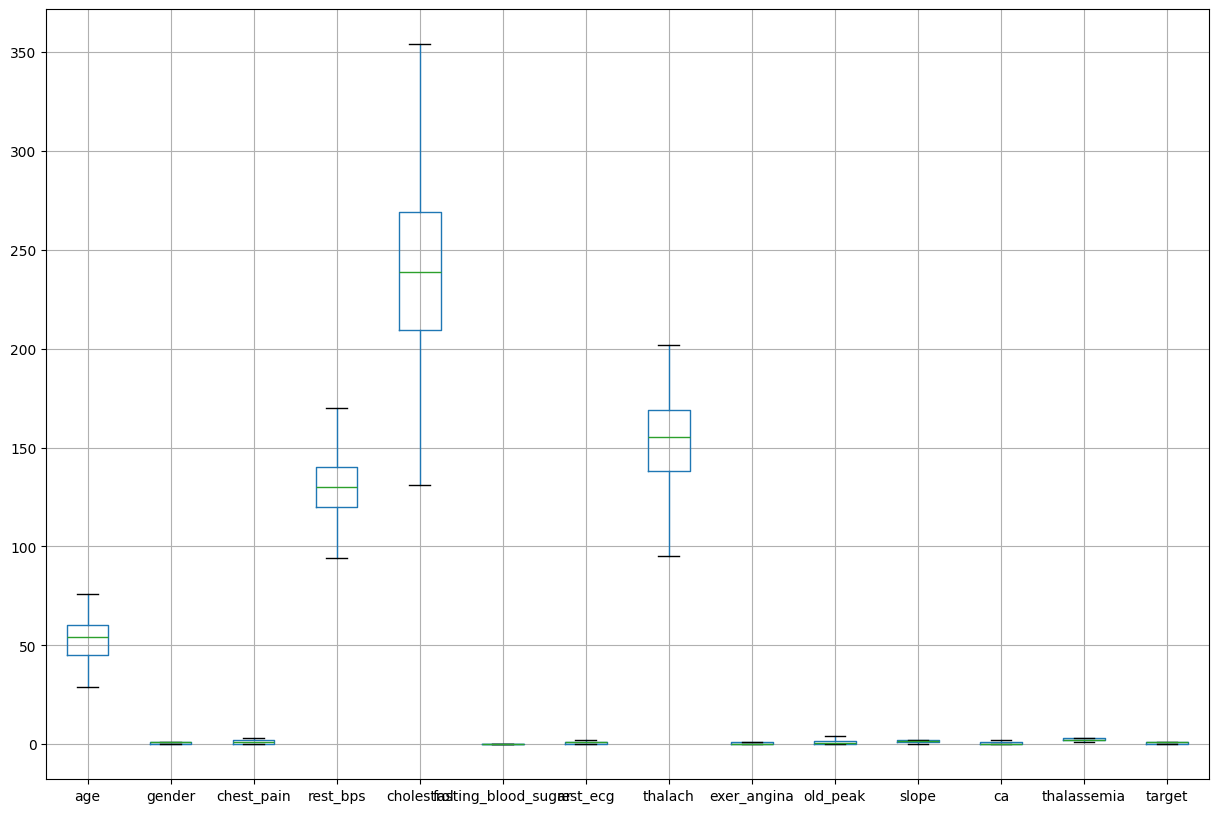

In [11]:
plt.figure(figsize=(15,10))
data1[num_col].boxplot()
plt.show()

In [12]:
x = data1.drop('target',axis=1)
y = data1['target']

### **Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

### **Traing and Testing data**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_trian, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [17]:
x_test.shape

(46, 13)

In [18]:
x_trian.shape

(180, 13)

### **Create Model**

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt = DecisionTreeClassifier(max_depth=3) # pruning
dt.fit(x_trian,y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
data1_score = dt.score(x_test,y_test)*100
data1_score 

71.73913043478261

In [22]:
data1_score = dt.score(x_trian,y_train)*100
data1_score

86.11111111111111

### **Graph**

In [23]:
from sklearn.tree import plot_tree 

In [24]:
x.shape

(226, 13)

In [25]:
data1.head(3)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [26]:
data1['target'].unique()

array([1, 0])

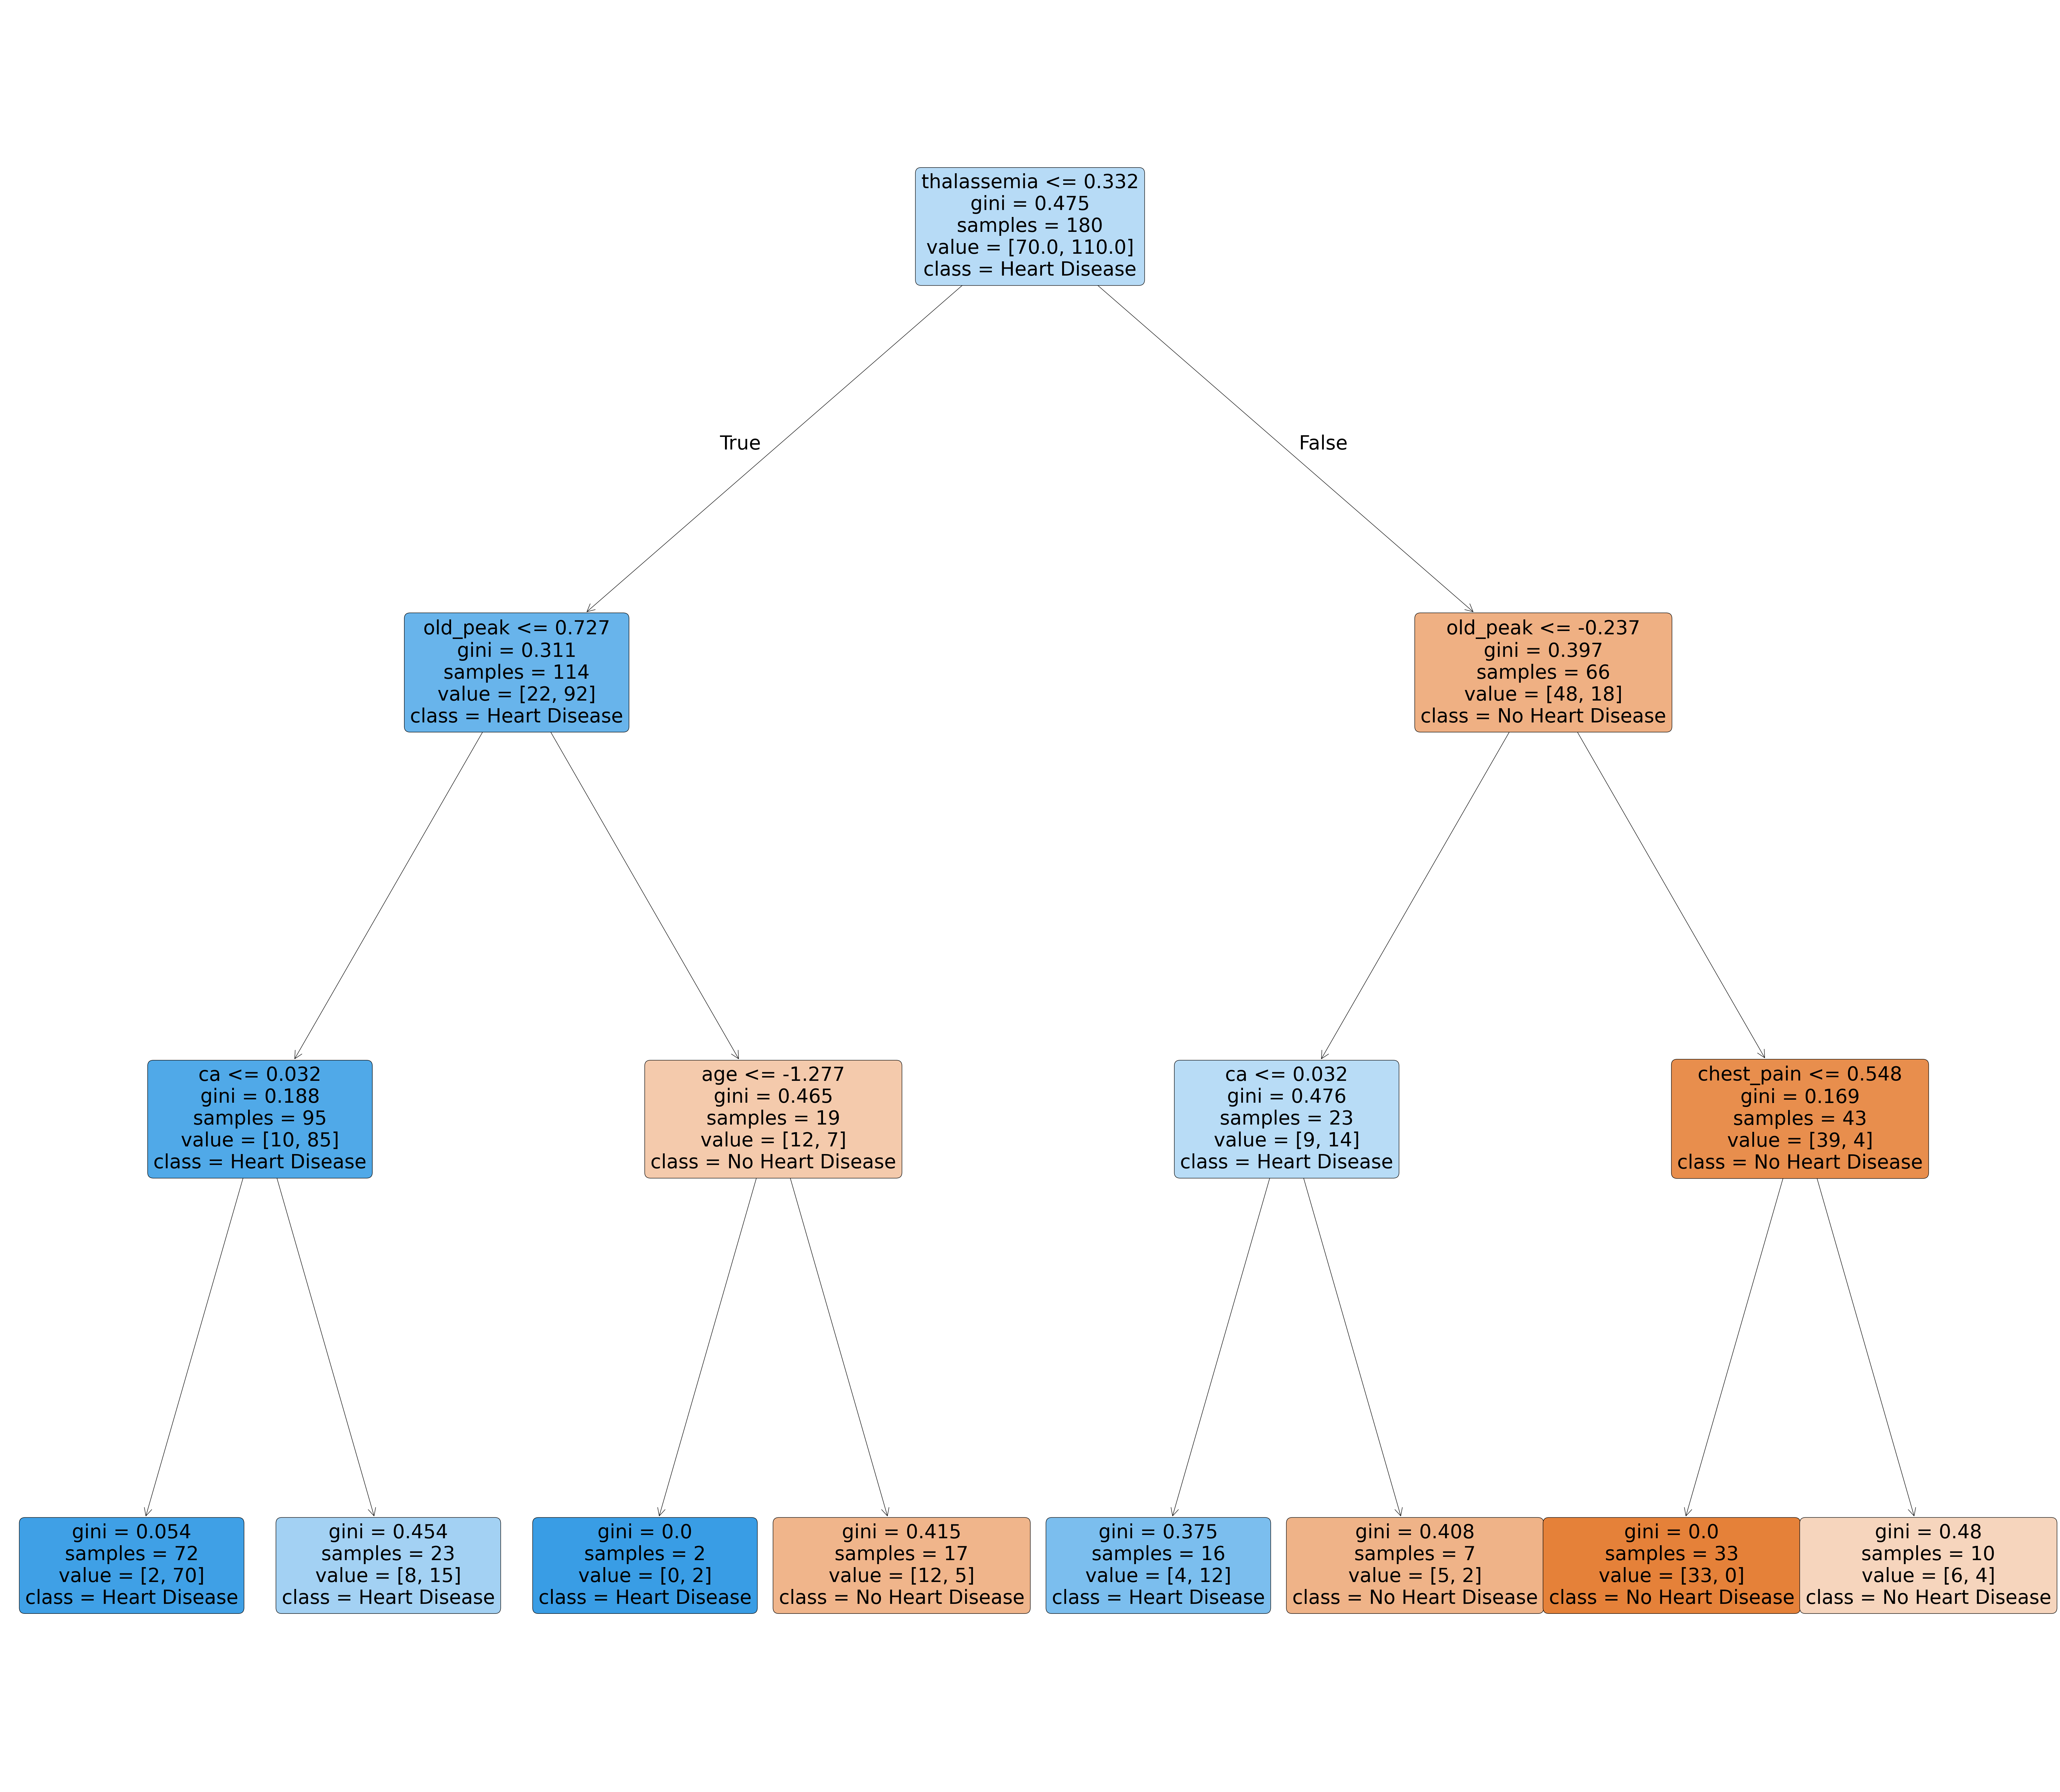

In [27]:
# Plotting the decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set figure size for better visibility
plt.figure(figsize=(80,70))

# Plot the decision tree
plot_tree(dt, filled=True, feature_names=x.columns,class_names=['No Heart Disease', 'Heart Disease'],rounded=True)
plt.savefig('DecisionTreeClassifier.jpg')
plt.show()

### **Pruning**

In [28]:
# post pruining
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_trian,y_train)
    print(dt2.score(x_trian,y_train),dt2.score(x_test,y_test),i)

0.7777777777777778 0.8043478260869565 1
0.8333333333333334 0.6739130434782609 2
0.8611111111111112 0.717391304347826 3
0.9277777777777778 0.7608695652173914 4
0.9666666666666667 0.7391304347826086 5
0.9944444444444445 0.7391304347826086 6
1.0 0.7608695652173914 7
1.0 0.7391304347826086 8
1.0 0.782608695652174 9
1.0 0.7391304347826086 10
1.0 0.7391304347826086 11
1.0 0.7608695652173914 12
1.0 0.7608695652173914 13
1.0 0.7608695652173914 14
1.0 0.7608695652173914 15
1.0 0.7608695652173914 16
1.0 0.7391304347826086 17
1.0 0.7608695652173914 18
1.0 0.7608695652173914 19
